# One dimensional Elastoplasticity

This example gives the numerical implementation of the one dimensional elastoplasticity model with an additive viscous term (Houlsby & Puzrin, 2006 - chapter 11.2.1).

The Helmholtz free energy $f$ and the flow potential $w$ for this model are given by:

\begin{align*}
f = & \frac{E}{2} (\epsilon - \alpha)^2 \\
w = & \frac{\left< |\chi| - k \right>^2}{2 \mu}
\end{align*}

The incremental response follows from a standardised approach, which can be written in the following form:

\begin{equation*}
\begin{Bmatrix}
\dot{\sigma} \\
-\dot{\bar{\chi}}
\end{Bmatrix}= 
\begin{bmatrix}
\frac{\partial^2 f}{\partial \epsilon^2} & \frac{\partial^2 f}{\partial \epsilon \partial \alpha} \\
\frac{\partial^2 f}{\partial \epsilon \partial \alpha} & \frac{\partial^2 f}{\partial \alpha^2} \\
\end{bmatrix} 
\begin{Bmatrix}
\dot{\epsilon} \\
\dot{\alpha}
\end{Bmatrix}
\end{equation*}

The rate of hardening strain is defined by:

\begin{equation*}
\dot{\alpha} = \frac{\partial w}{\partial \chi}
\end{equation*}

In [1]:
# The implementation of the above equations is given below
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Model parameters
E = 1
k = 1
mu = 0.1

# Initialise the model state parameters
sigma = 0
chi = 0
alpha = 0

# Define the applied strain history
epsilon_max_abs = 4
d_epsilon_abs = 0.01
epsilon_history = np.append(np.append(np.arange(0, epsilon_max_abs, 
        d_epsilon_abs), np.arange(epsilon_max_abs, -epsilon_max_abs, 
        -d_epsilon_abs)), np.arange(-epsilon_max_abs, 0, d_epsilon_abs))
sigma_history = np.zeros(len(epsilon_history))

d_t = 0.01

d2_f_d_e2 =  E
d2_f_d_a2 =  E
d2_f_d_ea = -E
d2_f_d_ae = -E

epsilon_0 = 0

# Calculate the incremental response
for index, epsilon in enumerate(epsilon_history):
    
    d_epsilon = epsilon-epsilon_0

    d_w_d_chi = np.sign(chi) * np.maximum(np.abs(chi)-k, 0) / mu
    d_alpha =  d_w_d_chi * d_t
    
    d_sigma = d2_f_d_e2 * d_epsilon + d2_f_d_ea * d_alpha
    d_chi = - (d2_f_d_ae * d_epsilon + d2_f_d_a2 * d_alpha)
    
    sigma = sigma + d_sigma
    chi = chi + d_chi
    alpha = alpha + d_alpha
    epsilon_0 = epsilon
    
    sigma_history[index] = sigma

Text(0,0.5,'$\\sigma$')

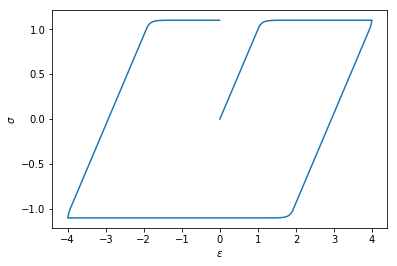

In [2]:
plt.plot(epsilon_history, sigma_history)
plt.xlabel('$\epsilon$')
plt.ylabel('$\sigma$')